In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import scipy as scp

In [2]:
stability_scores = pd.read_csv('./final_stability_scores_all.csv',index_col=0)

# Glycine rescue test:

In [3]:
prefix_handle = open('./designs_prefix_for_comparison.list','r')
tested_prefixes = [ i[:-1] for i in prefix_handle.readlines() ]
prefix_handle.close()

In [4]:
index_w_reliable_data = [ pref for pref in tested_prefixes if (pref in stability_scores.index) and ('grc_'+pref in stability_scores.index) ]

In [5]:
gly_scores = pd.DataFrame.from_csv('gly_resc_score_per_prefix.csv')

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [6]:
resc_relation_dict = {'ori_ss':[],'ctl_ss':[],'gly_stabilization':[],'gly_score':[]}
for i in index_w_reliable_data:
    resc_relation_dict['ori_ss'].append(stability_scores.loc[i].values[0])
    resc_relation_dict['ctl_ss'].append(stability_scores.loc['grc_'+i].values[0])
    resc_relation_dict['gly_stabilization'].append(stability_scores.loc[i].values[0]-stability_scores.loc['grc_'+i].values[0])
    resc_relation_dict['gly_score'].append(gly_scores.loc[i].values[0])
gly_stabilization_df = pd.DataFrame(resc_relation_dict,index=index_w_reliable_data)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


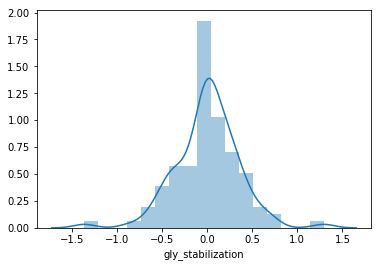

Ttest_relResult(statistic=-0.11597038975940425, pvalue=0.9079109251257007)

In [7]:
sns.distplot(gly_stabilization_df.gly_stabilization)
plt.show()
scp.stats.ttest_rel(gly_stabilization_df.ctl_ss,gly_stabilization_df.ori_ss)

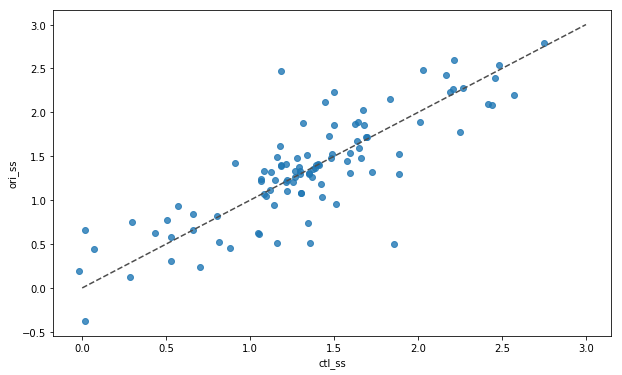

In [8]:
f, ax = plt.subplots(figsize=(10, 6))
sns.regplot(gly_stabilization_df.ctl_ss,gly_stabilization_df.ori_ss,fit_reg=False,ax=ax)
ax.plot((0,3), (0,3), ls="--", c=".3")

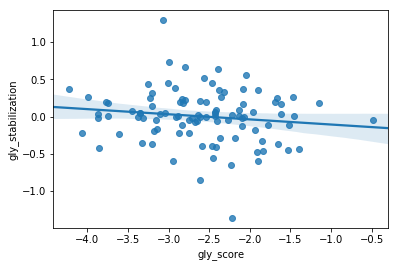

LinregressResult(slope=-0.06894263589830588, intercept=-0.17469797868606501, rvalue=-0.1372712341990688, pvalue=0.173226091659328, stderr=0.05025328706689971)

In [9]:
sns.regplot(gly_stabilization_df.gly_score,gly_stabilization_df.gly_stabilization)
plt.show()
scp.stats.linregress(gly_stabilization_df.gly_score,gly_stabilization_df.gly_stabilization)

# Trypstophan rescue test:

In [10]:
trp_Score_df = pd.DataFrame.from_csv('./trp_score.cst')

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [11]:
trp_index_w_reliable_data = [ pref for pref in trp_Score_df.index if (pref in stability_scores.index) and ('tlc_'+pref in stability_scores.index) ]

In [12]:
trp_resc_relation_dict = {'ori_ss':[],'ctl_ss':[],'trp_stabilization':[],'trp_score':[]}
for i in trp_index_w_reliable_data:
    trp_resc_relation_dict['ori_ss'].append(stability_scores.loc[i].values[0])
    trp_resc_relation_dict['ctl_ss'].append(stability_scores.loc['tlc_'+i].values[0])
    trp_resc_relation_dict['trp_stabilization'].append(stability_scores.loc[i].values[0]-stability_scores.loc['tlc_'+i].values[0])
    trp_resc_relation_dict['trp_score'].append(trp_Score_df.loc[i].values[0])
trp_stabilization_df = pd.DataFrame(trp_resc_relation_dict,index=trp_index_w_reliable_data)

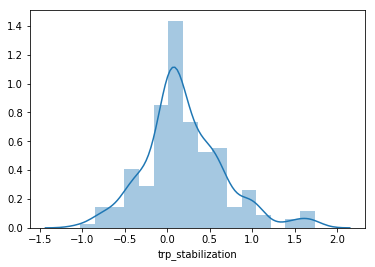

Ttest_relResult(statistic=-5.843848416969329, pvalue=2.0839182604031864e-08)
Average stabilization effect: 0.197


In [13]:
sns.distplot(trp_stabilization_df.trp_stabilization)
plt.show()
print(scp.stats.ttest_rel(trp_stabilization_df.ctl_ss,trp_stabilization_df.ori_ss))
print("Average stabilization effect: %0.3f"%np.average(trp_stabilization_df.trp_stabilization))

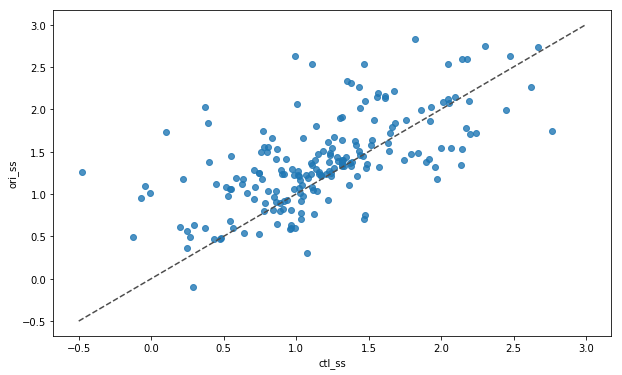

In [14]:
f, ax1 = plt.subplots(figsize=(10, 6))
sns.regplot(trp_stabilization_df.ctl_ss,trp_stabilization_df.ori_ss,fit_reg=False,ax=ax1)
ax1.plot((-0.5,3), (-0.5,3), ls="--", c=".3")

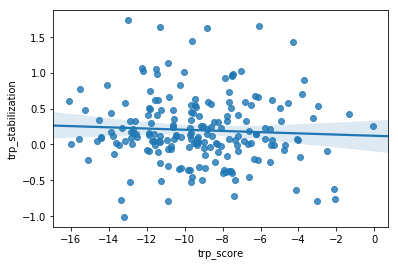

LinregressResult(slope=-0.008441318553121219, intercept=0.1189155739903856, rvalue=-0.05563999901810912, pvalue=0.43623280288710997, stderr=0.010819865225927794)

In [15]:
sns.regplot(trp_stabilization_df.trp_score,trp_stabilization_df.trp_stabilization)
plt.show()
scp.stats.linregress(trp_stabilization_df.trp_score,trp_stabilization_df.trp_stabilization)

In [16]:
len(trp_stabilization_df)

198

In [17]:
len(gly_stabilization_df)

100